In [1]:
import os
import glob
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
import numpy as np


# Define the directory path
#directory_path = r"C:\Users\Edward Kim\Documents\UT Austin 2020-2021\fifth year first semester\Machine learning\train-commerce-forecasting-main\scratchpad\Data"
directory_path = "../data"
# Get the list of all files in the directory
files = os.listdir(directory_path)

# Filter to grab only the files (not directories)
files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]

In [2]:
train=files[0:8]
test=files[8:9]
#validation=files[8:9]

In [3]:
train

['All_Traffic 2011.csv',
 'All_Traffic 2012.csv',
 'All_Traffic 2013.csv',
 'All_Traffic 2014.csv',
 'All_Traffic 2015.csv',
 'All_Traffic 2016.csv',
 'All_Traffic 2017.csv',
 'All_Traffic 2018.csv']

In [4]:
test

['All_Traffic 2019.csv']

In [5]:
x_train_All_Traffic = []
y_train_All_Traffic = []
x_test_All_Traffic = []
y_test_All_Traffic = []

# Process the training files
for file in train:
    # Read the CSV file
    one_year_data_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_All_Traffic = one_year_data_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    x_All_Traffic['year'] = int(file[12:16])
    y_All_Traffic = one_year_data_All_Traffic['log_carloads']
    
    # Append data to training lists
    x_train_All_Traffic.append(x_All_Traffic)
    y_train_All_Traffic.append(y_All_Traffic)

# Process the testing file
for file in test:
    # Read the CSV file
    one_year_data_test_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_test_All_Traffic.dropna(inplace=True)
    print(file[12:16])
    # Split into features and target
    x_test_All_Traffic1 = one_year_data_test_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    x_test_All_Traffic1['year'] = int(file[12:16])
    y_test_All_Traffic1 = one_year_data_test_All_Traffic['log_carloads']
    
    # Append data to testing lists
    x_test_All_Traffic.append(x_test_All_Traffic1)
    y_test_All_Traffic.append(y_test_All_Traffic1)

x_train_All_Traffic = pd.concat(x_train_All_Traffic)
y_train_All_Traffic = pd.concat(y_train_All_Traffic)
x_test_All_Traffic = pd.concat(x_test_All_Traffic)
y_test_All_Traffic = pd.concat(y_test_All_Traffic)


# save column names of x_train_All_Traffic
column_names = x_train_All_Traffic.columns
column_names_begin = column_names[0:1]
column_names_end = column_names[3:]
column_names_orig = list(column_names_begin.append(column_names_end))

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse=False, drop=None)
x_train_All_Traffic_encoded = encoder.fit_transform(x_train_All_Traffic.iloc[:,1:3])
x_test_All_Traffic_encoded = encoder.transform(x_test_All_Traffic.iloc[:,1:3])
extra_columns=len(x_train_All_Traffic_encoded[0])
column_names = column_names_orig + ['encoded' + str(i) for i in range(extra_columns)]

# get rid of columns that were encoded
x_train_All_Traffic = x_train_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)
x_test_All_Traffic = x_test_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)

# Scaling the data
scaler = StandardScaler()
x_train_All_Traffic_scaled = scaler.fit_transform(x_train_All_Traffic)
x_test_All_Traffic_scaled = scaler.transform(x_test_All_Traffic)
#x_validation_All_Traffic_scaled = scaler.transform(x_validation_All_Traffic)

# now add encoded data to the scaled data
x_train_All_Traffic = pd.concat([pd.DataFrame(x_train_All_Traffic_scaled), pd.DataFrame(x_train_All_Traffic_encoded)], axis=1)
x_test_All_Traffic = pd.concat([pd.DataFrame(x_test_All_Traffic_scaled), pd.DataFrame(x_test_All_Traffic_encoded)], axis=1)

# add column names to first 21 columns of x_train_All_Traffic and x_test_All_Traffic
x_train_All_Traffic.columns = column_names
x_test_All_Traffic.columns = column_names

# copy of x_train_All_Traffic and x_test_All_Traffic and y_train_All_Traffic and y_test_All_Traffic
x_train_All_Traffic_copy = x_train_All_Traffic.copy()
x_test_All_Traffic_copy = x_test_All_Traffic.copy()
y_train_All_Traffic_copy = y_train_All_Traffic.copy()
y_test_All_Traffic_copy = y_test_All_Traffic.copy()

# ndarray of x_train_All_Traffic and y_train_All_Traffic and x_test_All_Traffic and y_test_All_Traffic
x_train_All_Traffic = x_train_All_Traffic.values
y_train_All_Traffic = y_train_All_Traffic.values
x_test_All_Traffic = x_test_All_Traffic.values
y_test_All_Traffic = y_test_All_Traffic.values


2019


c:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
n_folds = 5
k_fold = KFold(n_splits=n_folds)

alphas = 10**np.linspace(-6,6,100)
lasso_avg_mse = {}
ridge_avg_mse = {}

In [7]:
for alpha in alphas:

  #Instantiate a lasso model with the current alpha
  ##  START CODE  ## (1 line of code)
  lasso=linear_model.Lasso(alpha=alpha)
  ##  END CODE    ##

  avg_mse = 0
  for k, (train, test1) in enumerate(k_fold.split(x_train_All_Traffic, y_train_All_Traffic)):

    #Fit the scaled training data to the lasso model
    lasso.fit(x_train_All_Traffic[train],y_train_All_Traffic[train])

    #Calculate the average mean sqaured error
    avg_mse=avg_mse+mean_squared_error(y_train_All_Traffic[test1],lasso.predict(x_train_All_Traffic[test1]))


  # Take the average mean squared error as metric
  lasso_avg_mse[alpha] = avg_mse / n_folds

c:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.716e+04, tolerance: 1.641e+01
  model = cd_fast.enet_coordinate_descent(
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e+04, tolerance: 1.621e+01
  model = cd_fast.enet_coordinate_descent(
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.681e+04, tolerance: 1.626e+01
  model = cd_fast.enet_coo

In [8]:
# Find the best value for alpha with minimum mean squared error
best_alpha_lasso = min(lasso_avg_mse,key=lasso_avg_mse.get)

print("Best lasso alpha: {}".format(best_alpha_lasso))

Best lasso alpha: 0.0003511191734215131


In [9]:
#For each value of alpha and each fold compute the mean square error
for alpha in alphas:

  #Instantiate a ridge model with the current alpha
  ridge=linear_model.Ridge(alpha=alpha)

  avg_mse = 0
  for k, (train, test1) in enumerate(k_fold.split(x_train_All_Traffic, y_train_All_Traffic)):

    #Fit the scaled training data to the lasso model
    ridge.fit(x_train_All_Traffic[train],y_train_All_Traffic[train])

    #Calculate the average mean sqaured error
    avg_mse=avg_mse+mean_squared_error(y_train_All_Traffic[test1],ridge.predict(x_train_All_Traffic[test1]))

  # Take the average mean squared error as metric
  ridge_avg_mse[alpha] = avg_mse / n_folds

In [10]:
# Find the best value for alpha with minimum mean squared error
best_alpha_ridge=min(ridge_avg_mse,key=ridge_avg_mse.get)

print("Best Ridge alpha: {}".format(best_alpha_ridge))

Best Ridge alpha: 2.6560877829466896


In [11]:
# Fit the Lasso model with the best alpha
lasso = linear_model.Lasso(alpha=best_alpha_lasso)
coefs_lasso = []
lasso.set_params(alpha=best_alpha_lasso)
lasso.fit(x_train_All_Traffic, y_train_All_Traffic)
coefs_lasso.append(lasso.coef_)
# Fit the Ridge model with the best alpha
ridge = linear_model.Ridge(alpha=best_alpha_ridge)
coefs_ridge = []
ridge.set_params(alpha=best_alpha_ridge)
ridge.fit(x_train_All_Traffic, y_train_All_Traffic)
coefs_ridge.append(ridge.coef_)

c:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.895e+03, tolerance: 2.032e+01
  model = cd_fast.enet_coordinate_descent(


In [12]:
model=linear_model.Lasso(alpha=best_alpha_lasso)
model.fit(x_test_All_Traffic,y_test_All_Traffic)
y_pred_lasso=model.predict(x_test_All_Traffic)
mse1=mean_squared_error(y_test_All_Traffic,y_pred_lasso)
R2_1=r2_score(y_test_All_Traffic,y_pred_lasso)
adj_R2_1 = 1 - (1-R2_1)*(len(y_test_All_Traffic)-1)/(len(y_test_All_Traffic)-x_test_All_Traffic.shape[1]-1)
print(f'Lasso Regularization Mean Squared Error: {mse1}, R2: {R2_1}, adj_R2: {adj_R2_1}')

model=linear_model.Ridge(alpha=best_alpha_ridge)
model.fit(x_test_All_Traffic,y_test_All_Traffic)
y_pred_ridge=model.predict(x_test_All_Traffic)
mse1=mean_squared_error(y_test_All_Traffic,y_pred_ridge)
R2_1=r2_score(y_test_All_Traffic,y_pred_ridge)
adj_R2_1 = 1 - (1-R2_1)*(len(y_test_All_Traffic)-1)/(len(y_test_All_Traffic)-x_test_All_Traffic.shape[1]-1)
print(f'Ridge Regularization Mean Squared Error: {mse1}, R2: {R2_1}, adj_R2: {adj_R2_1}')

Lasso Regularization Mean Squared Error: 6.63111656730781, R2: 0.5516977008569421, adj_R2: 0.5221143004058775
Ridge Regularization Mean Squared Error: 6.646079478046514, R2: 0.5506861204966896, adj_R2: 0.5210359660116997


c:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+03, tolerance: 2.486e+00
  model = cd_fast.enet_coordinate_descent(


In [13]:
# plot the difference between 

Text(0, 0.5, 'Actual')

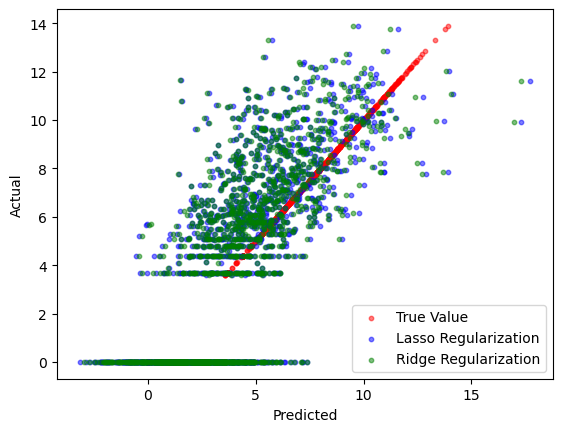

In [16]:
#y_pred_total=
#plot the difference between y_test_All_Traffic and y_pred_lasso and y_pred_ridge
fig, ax = plt.subplots()
#x_ax = range(len(y_test_All_Traffic))
ax.scatter(y_test_All_Traffic, y_test_All_Traffic, c='r', label='True Value',alpha=0.5,s=10)
ax.scatter(y_pred_lasso, y_test_All_Traffic, c='b', label='Lasso Regularization',alpha=0.5,s=10)
ax.scatter(y_pred_ridge, y_test_All_Traffic, c='g', label='Ridge Regularization',alpha=0.5,s=10)

ax.legend()
plt.xlabel('Predicted')
plt.ylabel('Actual')